### Importing Libraries

In [1]:
#Importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.metrics import f1_score,classification_report

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
#reading the data
data=pd.read_csv('Loan data cleaned.csv')

In [3]:
#first five rows of the data
data.head()

,loannumber,loanamount,totaldue,termdays,good_bad_flag,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,...,ploan_additional charges_50%_x,ploan_additional charges_75%_x,ploan_additional charges_max_x,ploan_additional charges_mean_y,ploan_additional charges_min_y,ploan_additional charges_25%_y,ploan_additional charges_50%_y,ploan_additional charges_75%_y,ploan_additional charges_max_y,not_repaid_percentage
0,12,30000.0,34500.0,30,Good,Other,3.432010,6.433055,Diamond Bank,Permanent,...,3800.000000,4500.000000,4500.000000,3900.000000,3000.000000,3400.000000,3800.000000,4500.000000,4500.000000,64.000000
1,2,15000.0,17250.0,30,Good,Savings,3.885298,7.320700,GT Bank,Permanent,...,2665.558293,3037.525723,3543.851778,2730.359972,2102.661161,2364.738902,2665.558293,3037.525723,3543.851778,63.573297
2,7,20000.0,22250.0,15,Good,Other,11.139350,10.292041,EcoBank,Permanent,...,1500.000000,1500.000000,3000.000000,1750.000000,1500.000000,1500.000000,1500.000000,1500.000000,3000.000000,50.000000
3,3,10000.0,11500.0,15,Good,Savings,3.985770,7.491708,First Bank,Permanent,...,2250.000000,2625.000000,3000.000000,2250.000000,1500.000000,1875.000000,2250.000000,2625.000000,3000.000000,0.000000
4,9,40000.0,44000.0,30,Good,Other,7.457913,9.076574,GT Bank,Permanent,...,3800.000000,5100.000000,9000.000000,4800.000000,3000.000000,3000.000000,3800.000000,5100.000000,9000.000000,100.000000


In [4]:
#make dummies of categorical columns('bank_account_type','bank_name_clients','employment_status_clients')
data=pd.get_dummies(data=data,columns=['bank_account_type','bank_name_clients','employment_status_clients'],drop_first=True)

### Separating independent and dependent variables.

In [5]:
x = data.drop(['good_bad_flag'], axis=1)
y = data['good_bad_flag'].replace({'Good':0, 'Bad':1})

In [6]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 101, stratify=y, test_size=0.15)

In [8]:
#Scalig the train and testing datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled, columns=X_train.columns)

x_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(x_test_scaled, columns=X_test.columns)

## Building an GBDT Model

In [9]:
#Importing GBDT Classifier 
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
#creating an Gradient boosting instance
clf = GradientBoostingClassifier(random_state=50)

In [13]:
#training the model
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=50, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [14]:
pred_train=clf.predict(X_train)
pred_test=clf.predict(X_test)

In [15]:
print('\033[1m',"Classification Report for training data",'\033[0m')
print(classification_report(pred_train, y_train))

 Classification Report for training data 
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      3381
           1       0.32      0.78      0.45       331

    accuracy                           0.83      3712
   macro avg       0.65      0.81      0.68      3712
weighted avg       0.92      0.83      0.86      3712



In [16]:
print('\033[1m',"Classification Report for test data",'\033[0m')
print(classification_report(pred_test, y_test))

 Classification Report for test data 
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       610
           1       0.20      0.63      0.31        46

    accuracy                           0.80       656
   macro avg       0.58      0.72      0.60       656
weighted avg       0.91      0.80      0.84       656



# GBDT Hyperparameters

### Model Based Hyperparameters

1. **n_estimators:** Total number of trees.
2. **loss:** The loss function to be minimized. 
3. **subsample:**The fraction of observations to be selected for each tree. Selection is done by random sampling.
4. **random_state:** The random number seed so that same random numbers are generated every time.
5. **learning_rate:** This determines the impact of each tree on the final outcome 

In [15]:
#creating an Gradient boosting instance
clf = GradientBoostingClassifier(random_state=101, n_estimators=500, subsample=0.7)

In [16]:
#training the model
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=101, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [17]:
pred_train=clf.predict(X_train)
pred_test=clf.predict(X_test)

In [18]:
print('\033[1m',"Classification Report for training data",'\033[0m')
print(classification_report(pred_train, y_train))

 Classification Report for training data 
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3184
           1       0.64      0.98      0.78       528

    accuracy                           0.92      3712
   macro avg       0.82      0.95      0.86      3712
weighted avg       0.95      0.92      0.93      3712



In [19]:
print('\033[1m',"Classification Report for test data",'\033[0m')
print(classification_report(pred_test, y_test))

 Classification Report for test data 
              precision    recall  f1-score   support

           0       0.95      0.81      0.87       596
           1       0.22      0.53      0.32        60

    accuracy                           0.79       656
   macro avg       0.58      0.67      0.59       656
weighted avg       0.88      0.79      0.82       656



### Tree Based Hyperparameters

1. **max_depth:** Maximum depth to which tree can grow (stopping criteria)
2. **max_features:** The number of features to consider while searching for a best split
3. **max_leaf_nodes:** The maximum number of terminal nodes or leaves in a tree
4. **min_samples_leaf:** Minimum samples required in a terminal node or leaf (stopping criteria)
5. **min_samples_split:** Minimum number of samples required in a node for splitting (stopping criteria)

In [21]:
#creating an Gradient boosting instance
clf = GradientBoostingClassifier(random_state=101, 
                                 min_samples_split=40,
                                 max_leaf_nodes=25,
                                 max_depth=6,
                                 n_iter_no_change=5,
                                 tol = 0.001,
                                 validation_fraction=0.2,
                                 subsample=0.8,n_estimators=500)

In [22]:
#training the model
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=25,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=40,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=5, presort='deprecated',
                           random_state=101, subsample=0.8, tol=0.001,
                           validation_fraction=0.2, verbose=0,
                           warm_start=False)

In [23]:
pred_train=clf.predict(X_train)
pred_test=clf.predict(X_test)

In [24]:
print('\033[1m',"Classification Report for training data",'\033[0m')
print(classification_report(pred_train, y_train))

 Classification Report for training data 
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      3389
           1       0.34      0.84      0.48       323

    accuracy                           0.84      3712
   macro avg       0.66      0.84      0.69      3712
weighted avg       0.93      0.84      0.87      3712



In [25]:
print('\033[1m',"Classification Report for test data",'\033[0m')
print(classification_report(pred_test, y_test))

 Classification Report for test data 
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       610
           1       0.20      0.63      0.31        46

    accuracy                           0.80       656
   macro avg       0.58      0.72      0.60       656
weighted avg       0.91      0.80      0.84       656



**WITH CHANGING LEARNING RATE AND N_ESTIMATORS**

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [23]:
gd_model=GradientBoostingClassifier(random_state=101)

In [25]:
tree_para = {'learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01],'n_estimators':[100, 200,300,400,500]}
clf = GridSearchCV(estimator=gd_model,param_grid=tree_para,scoring='f1',cv=StratifiedKFold(10))
clf=clf.fit(X_train, y_train)

In [26]:
clf_pred_test=clf.predict(X_test)
clf_pred_train=clf.predict(X_train)

In [27]:
clf.best_params_

{'learning_rate': 0.5, 'n_estimators': 400}

In [28]:
print('\033[1m',"Classification Report for test data",'\033[0m')
print(classification_report(y_test,clf_pred_test))

 Classification Report for test data 
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       513
           1       0.48      0.28      0.35       143

    accuracy                           0.78       656
   macro avg       0.65      0.60      0.61       656
weighted avg       0.75      0.78      0.75       656



In [29]:
print('\033[1m',"Classification Report for training data",'\033[0m')
print(classification_report(y_train, clf_pred_train))

 Classification Report for training data 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2903
           1       1.00      0.99      1.00       809

    accuracy                           1.00      3712
   macro avg       1.00      1.00      1.00      3712
weighted avg       1.00      1.00      1.00      3712



# WITH ONE PARAMETER AT A TIME

--Learning Rate

In [12]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingClassifier(learning_rate=eta,random_state=101)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    f1_train=f1_score(y_train,train_pred)
    f1_test=f1_score(y_test,test_pred)
    train_results.append(f1_train)
    test_results.append(f1_test)

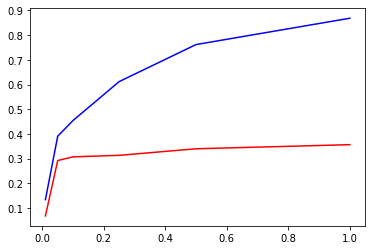

In [18]:
plt.plot(learning_rates, train_results, 'b', label="Train F1")
plt.plot(learning_rates, test_results, 'r', label="Test F1")

--n_estimators

In [19]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200,400,500]
train_results = []
test_results = []
for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator,random_state=101)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    f1_train=f1_score(y_train,train_pred)
    f1_test=f1_score(y_test,test_pred)
    train_results.append(f1_train)
    test_results.append(f1_test)

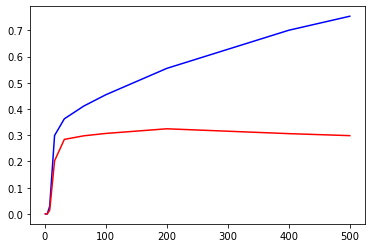

In [21]:
plt.plot(n_estimators, train_results, 'b', label="Train F1")
plt.plot(n_estimators, test_results, 'r', label="Test F1")

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [11]:
gd_model=GradientBoostingClassifier(n_estimators=400,learning_rate=0.5)

In [ ]:
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],'min_samples_split':[2,4,8,10,15,25,30,40,50,55],'max_leaf_nodes':range(5,30,5)}
clf = GridSearchCV(estimator=gd_model,param_grid=tree_para,scoring='f1',cv=StratifiedKFold(10))
clf=clf.fit(X_train, y_train)

In [25]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 5,
 'min_samples_split': 2}

In [28]:
#with best para
model = GradientBoostingClassifier(n_estimators=200,learning_rate=1.0,random_state=101,max_depth=4,max_leaf_nodes=5,min_samples_split=2)
model.fit(X_train,y_train)
predict_tr=model.predict(X_train)
predict_ts=model.predict(X_test)

In [29]:
print('\033[1m',"Classification Report for test data",'\033[0m')
print(classification_report(y_test, predict_ts))

 Classification Report for test data 
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       513
           1       0.41      0.24      0.31       143

    accuracy                           0.76       656
   macro avg       0.61      0.57      0.58       656
weighted avg       0.72      0.76      0.73       656



In [30]:
print('\033[1m',"Classification Report for training data",'\033[0m')
print(classification_report(y_train, predict_tr))

 Classification Report for training data 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2903
           1       0.99      0.89      0.94       809

    accuracy                           0.97      3712
   macro avg       0.98      0.94      0.96      3712
weighted avg       0.97      0.97      0.97      3712

